# Homework Lesson 8 - Neural Networks and Deep Learning

## Dataset

We will use the "Dino or Dragon?" dataset that can be downloaded from Kaggle.

You can get a wget-able version here:

wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip

## Loading Images

In [20]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') # comment me out on a computer with an GPU! 
from tensorflow import keras

2022-11-20 20:03:19.343357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 20:03:19.538697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-20 20:03:19.538747: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 20:03:20.411614: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

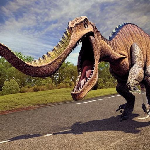

In [4]:
path = './dino-dragon/train/dino'
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size = (150, 150))

In [5]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_gen = ImageDataGenerator(rescale=1.0/255)

train_ds = train_gen.flow_from_directory(
    './dino-dragon/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    
)

Found 1600 images belonging to 2 classes.


In [8]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [9]:
X, y = next(train_ds)

In [10]:
val_gen = ImageDataGenerator(rescale=1.0/255)

val_ds = val_gen.flow_from_directory(
    './dino-dragon/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


## Create Model

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-20 20:03:22.004483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:

learning_rate = 0.002
momentum = 0.8
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum = momentum)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 58s 709ms/step - loss: 0.6644 - accuracy: 0.5906 - val_loss: 0.5994 - val_accuracy: 0.6675
Epoch 2/10
80/80 [==============================] - 56s 695ms/step - loss: 0.5298 - accuracy: 0.7688 - val_loss: 0.4656 - val_accuracy: 0.8274
Epoch 3/10
80/80 [==============================] - 54s 669ms/step - loss: 0.4320 - accuracy: 0.8131 - val_loss: 0.3987 - val_accuracy: 0.8350
Epoch 4/10
80/80 [==============================] - 53s 663ms/step - loss: 0.3818 - accuracy: 0.8400 - val_loss: 0.4216 - val_accuracy: 0.8096
Epoch 5/10
80/80 [==============================] - 53s 659ms/step - loss: 0.3295 - accuracy: 0.8744 - val_loss: 0.3497 - val_accuracy: 0.8579
Epoch 6/10
80/80 [==============================] - 55s 682ms/step - loss: 0.3133 - accuracy: 0.8694 - val_loss: 0.3107 - val_accuracy: 0.8680
Epoch 7/10
80/80 [==============================] - 55s 685ms/step - loss: 0.2685 - accuracy: 0.8944 - val_loss: 0.2908 - val_accuracy: 0.8782

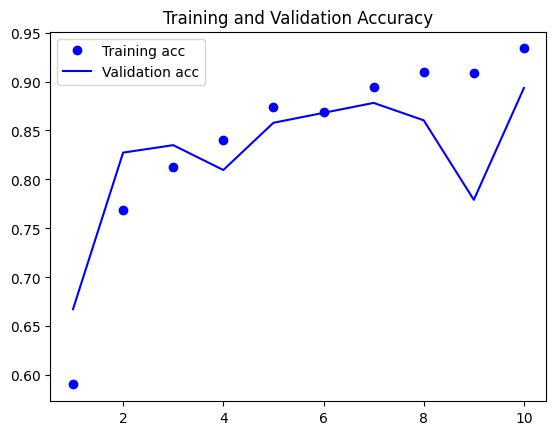

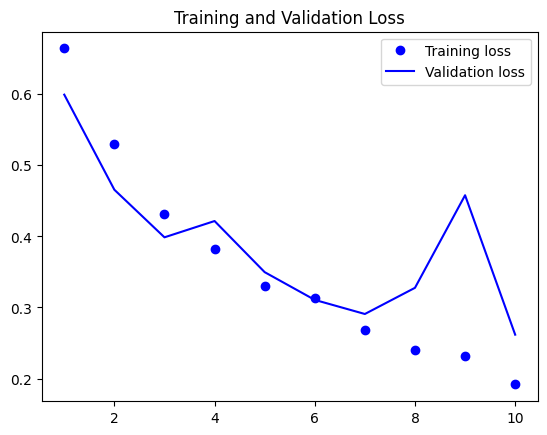

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [16]:
acc_median = np.median(acc)
acc_median

0.871874988079071

In [17]:
loss_std = np.std(loss)
loss_std

0.14067565126037165

In [18]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
from tensorflow.keras.preprocessing import image

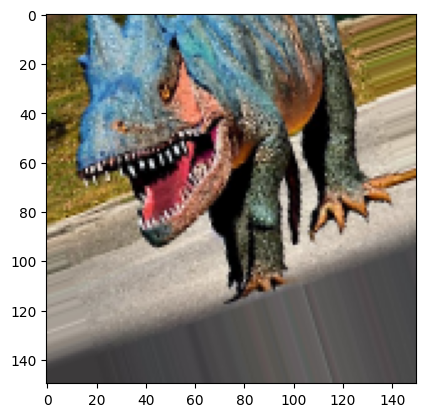

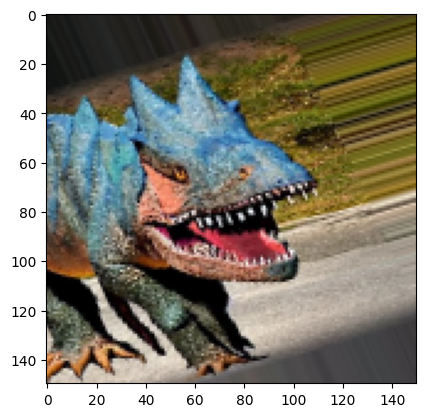

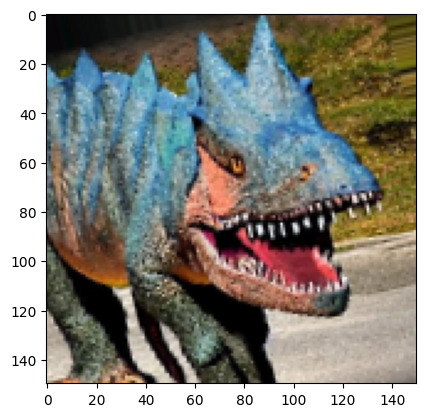

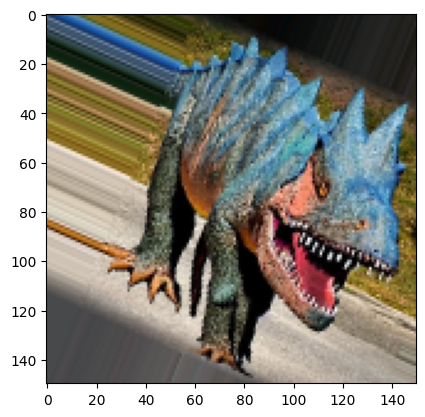

In [26]:

train_dir = './dino-dragon/train'
fnames = [os.path.join(train_dir+"/dino", fname) for
    fname in os.listdir(train_dir+"/dino")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [28]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1600 images belonging to 2 classes.


In [32]:
validation_dir = './dino-dragon/test'
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [33]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
50/50 [==============================] - 65s 1s/step - loss: 0.4412 - accuracy: 0.8087 - val_loss: 0.3322 - val_accuracy: 0.8604
Epoch 2/10
50/50 [==============================] - 59s 1s/step - loss: 0.4370 - accuracy: 0.8050 - val_loss: 0.3580 - val_accuracy: 0.8401
Epoch 3/10
50/50 [==============================] - 56s 1s/step - loss: 0.3919 - accuracy: 0.8238 - val_loss: 0.4837 - val_accuracy: 0.7817
Epoch 4/10
50/50 [==============================] - 55s 1s/step - loss: 0.4025 - accuracy: 0.8169 - val_loss: 0.3540 - val_accuracy: 0.8325
Epoch 5/10
50/50 [==============================] - 55s 1s/step - loss: 0.3902 - accuracy: 0.8250 - val_loss: 0.3465 - val_accuracy: 0.8452
Epoch 6/10
50/50 [==============================] - 56s 1s/step - loss: 0.3882 - accuracy: 0.8163 - val_loss: 0.3195 - val_accuracy: 0.8655
Epoch 7/10
50/50 [==============================] - 56s 1s/step - loss: 0.3741 - accuracy: 0.8294 - val_loss: 0.5045 - val_accuracy: 0.7766
Epoch 8/10
50/50 [==

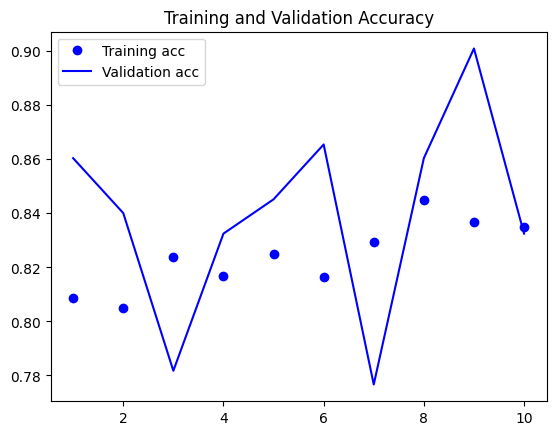

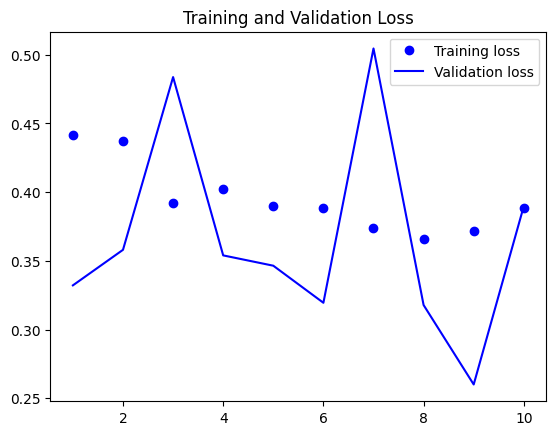

In [34]:
acc_aug = history.history['accuracy']
val_acc_aug = history.history['val_accuracy']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [35]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.3665967881679535

In [36]:
val_acc_aug[5:10]

[0.8654822111129761,
 0.7766497731208801,
 0.8604061007499695,
 0.9010152220726013,
 0.8324872851371765]

In [37]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.8472081184387207